# Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [1]:
import numpy as np
import pandas as pd

In [128]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [129]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [130]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [131]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [133]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [134]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [135]:
train['is_test'] = 0
test['is_test'] = 1

In [136]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [137]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "PassengerId","Embarked"], axis=1, inplace=True)

In [138]:
addresses = ['Miss', 'Sir', 'Esq', 'Mrs', 'Ms', 'Mr' ]
dfAd = pd.DataFrame()
for a in addresses:
    dfAd[a] = pd.Series(0, index=df.index)

df = pd.concat([df, dfAd], axis=1, join_axes=[df.index])

In [139]:
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,is_test,isMale,Miss,Sir,Esq,Mrs,Ms,Mr
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,0,0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,0,0,0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,0,0,0,0,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,0,0,0,0


In [140]:
data = {}

def findAddressing(s ):
    global addresses
#     print(s)
    match = next((x for x in addresses if x in s.Name), 'delete')
    s[match] = 1
#     print(match)
    return s
        
    

In [141]:
df = df.apply(findAddressing, axis=1) #Mr., Sir, Esq., а по отношению к женщине - Mrs., Ms., Miss, Madam.


In [142]:
df.drop('delete', axis=1, inplace=True)

In [143]:
df.head()

,Age,Esq,Fare,Miss,Mr,Mrs,Ms,Name,Parch,Pclass,SibSp,Sir,isMale,is_test
0,22.0,0,7.2500,0,1,0,0,"Braund, Mr. Owen Harris",0,3,1,0,1,0
1,38.0,0,71.2833,0,0,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,0,0
2,26.0,0,7.9250,1,0,0,0,"Heikkinen, Miss. Laina",0,3,0,0,0,0
3,35.0,0,53.1000,0,0,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,0,0
4,35.0,0,8.0500,0,1,0,0,"Allen, Mr. William Henry",0,3,0,0,1,0


In [144]:
df.drop(["Name"], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [145]:
df_dummies = pd.get_dummies(df, columns=['Pclass'])#, 'Embarked'])

In [146]:
df_dummies.head()

,Age,Esq,Fare,Miss,Mr,Mrs,Ms,Parch,SibSp,Sir,isMale,is_test,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,7.2500,0,1,0,0,0,1,0,1,0,0,0,1
1,38.0,0,71.2833,0,0,1,0,0,1,0,0,0,1,0,0
2,26.0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,1
3,35.0,0,53.1000,0,0,1,0,0,1,0,0,0,1,0,0
4,35.0,0,8.0500,0,1,0,0,0,0,0,1,0,0,0,1


In [147]:
df_dummies.isnull().sum()

Age         263
Esq           0
Fare          1
Miss          0
Mr            0
Mrs           0
Ms            0
Parch         0
SibSp         0
Sir           0
isMale        0
is_test       0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [148]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [149]:
columns = X_train.columns

In [150]:
X_train.head()

,Age,Esq,Fare,Miss,Mr,Mrs,Ms,Parch,SibSp,Sir,isMale,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,7.2500,0,1,0,0,0,1,0,1,0,0,1
1,38.0,0,71.2833,0,0,1,0,0,1,0,0,1,0,0
2,26.0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1
3,35.0,0,53.1000,0,0,1,0,0,1,0,0,1,0,0
4,35.0,0,8.0500,0,1,0,0,0,0,0,1,0,0,1


In [151]:
X_test.head()

,Age,Esq,Fare,Miss,Mr,Mrs,Ms,Parch,SibSp,Sir,isMale,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,7.8292,0,1,0,0,0,0,0,1,0,0,1
1,47.0,0,7.0000,0,0,1,0,0,1,0,0,0,0,1
2,62.0,0,9.6875,0,1,0,0,0,0,0,1,0,1,0
3,27.0,0,8.6625,0,1,0,0,0,0,0,1,0,0,1
4,22.0,0,12.2875,0,0,1,0,1,1,0,0,0,0,1


### Заполнение пустых значений

заполним пустые значения средними по соответственным признакам

In [152]:
from sklearn.preprocessing import Imputer

In [153]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [154]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [155]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

In [156]:
X_train_imputed.head()

,Age,Esq,Fare,Miss,Mr,Mrs,Ms,Parch,SibSp,Sir,isMale,Pclass_1,Pclass_2,Pclass_3
0,22.0,0.0,7.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,0.0,71.2833,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0.0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,35.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,35.0,0.0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Нормировка значений

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

In [159]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [160]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [161]:
X_train_imputed_scaled.head(10)

,Age,Esq,Fare,Miss,Mr,Mrs,Ms,Parch,SibSp,Sir,isMale,Pclass_1,Pclass_2,Pclass_3
0,-0.592481,0.0,-0.502445,-0.506655,0.854457,-0.407714,-0.03352,-0.473674,0.432793,-0.058124,0.737695,-0.565685,-0.510152,0.902587
1,0.638789,0.0,0.786845,-0.506655,-1.170334,2.452702,-0.03352,-0.473674,0.432793,-0.058124,-1.355574,1.767767,-0.510152,-1.107926
2,-0.284663,0.0,-0.488854,1.973729,-1.170334,-0.407714,-0.03352,-0.473674,-0.474545,-0.058124,-1.355574,-0.565685,-0.510152,0.902587
3,0.407926,0.0,0.420730,-0.506655,-1.170334,2.452702,-0.03352,-0.473674,0.432793,-0.058124,-1.355574,1.767767,-0.510152,-1.107926
4,0.407926,0.0,-0.486337,-0.506655,0.854457,-0.407714,-0.03352,-0.473674,-0.474545,-0.058124,0.737695,-0.565685,-0.510152,0.902587
5,0.000000,0.0,-0.478116,-0.506655,0.854457,-0.407714,-0.03352,-0.473674,-0.474545,-0.058124,0.737695,-0.565685,-0.510152,0.902587
6,1.870059,0.0,0.395814,-0.506655,0.854457,-0.407714,-0.03352,-0.473674,-0.474545,-0.058124,0.737695,1.767767,-0.510152,-1.107926
7,-2.131568,0.0,-0.224083,-0.506655,-1.170334,-0.407714,-0.03352,0.767630,2.247470,-0.058124,0.737695,-0.565685,-0.510152,0.902587
8,-0.207709,0.0,-0.424256,-0.506655,-1.170334,2.452702,-0.03352,2.008933,-0.474545,-0.058124,-1.355574,-0.565685,-0.510152,0.902587
9,-1.208115,0.0,-0.042956,-0.506655,-1.170334,2.452702,-0.03352,-0.473674,0.432793,-0.058124,-1.355574,-0.565685,1.960202,-1.107926


In [162]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

### Offtop: попробуем визуализировать всех пассажиров: есть ли там кластеры?
### PCA + clustering

In [163]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA(n_components=2)

In [165]:
ppl = pca.fit_transform(X_train_imputed_scaled)

всего 2 фичи объясняют 41% всего разнообразия пассажиров:

In [166]:
pca.explained_variance_ratio_.sum()

0.40352610875296879

классно, видно 6 кластеров пассажиров: внутри кластера они похожи друг на друга, межу кластерами - нет:

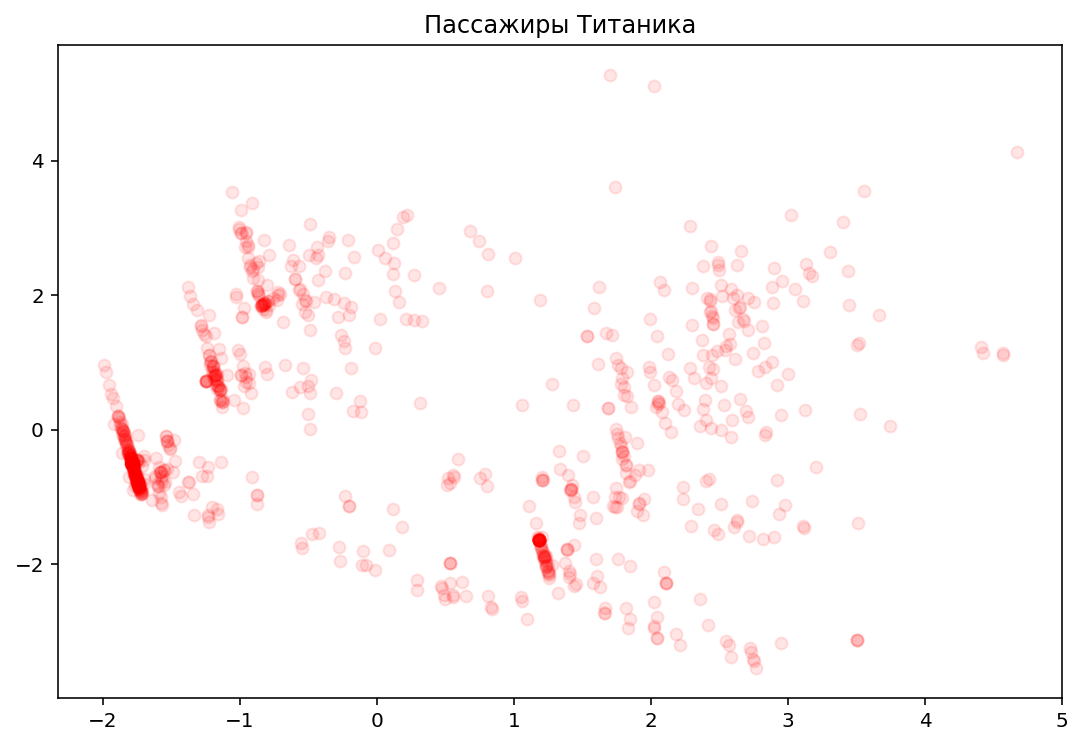

In [167]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

можно попробовать кластеризовать по 7 кластерам и проверить, что получится:

In [168]:
from sklearn.cluster import KMeans

In [169]:
n_clusters = 2

In [170]:
kmeans = KMeans(n_clusters=n_clusters)

In [171]:
kmeans.fit(X_train_imputed_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [172]:
cluster_labels = kmeans.predict(X_train_imputed_scaled)

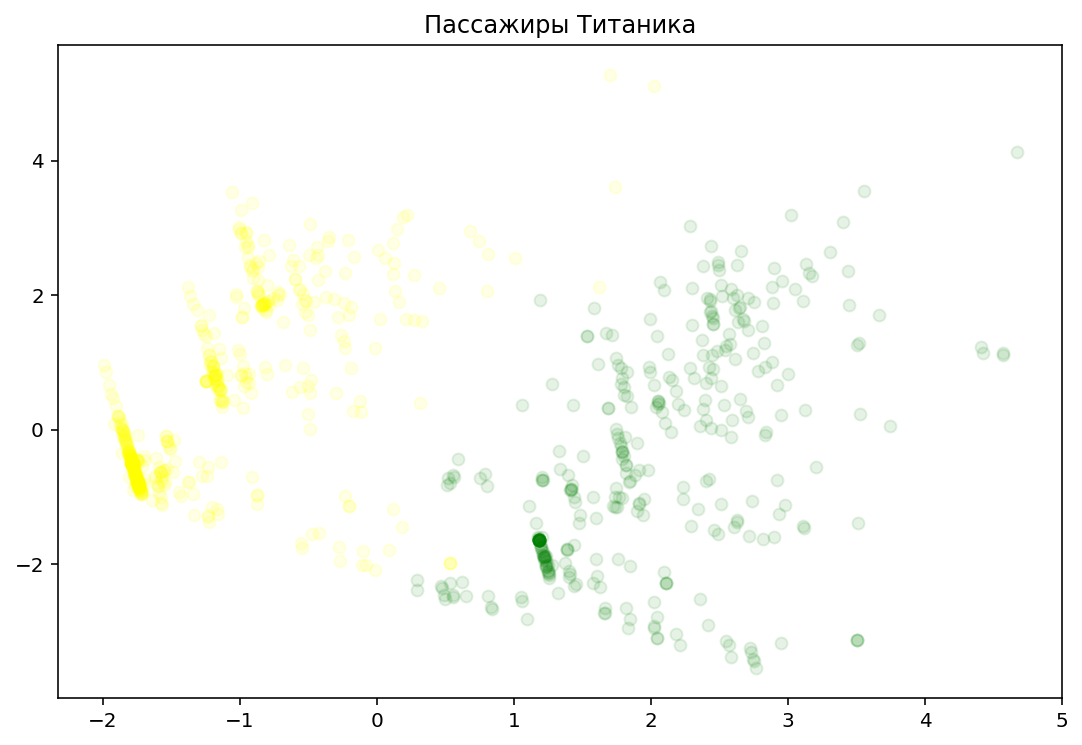

In [173]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

### Разделение на обучающую и тестирующую выборки

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [176]:
X_train_fin.shape

(712, 14)

In [177]:
X_val.shape

(179, 14)

In [178]:
X_test_imputed_scaled.shape

(418, 14)

In [179]:
y_train_fin.shape

(712,)

In [180]:
y_val.shape

(179,)

### Обучение с кросс-валидацией

кросс-валидация поможет нам подобрать лучший параметр регуляризации

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [182]:
cs = 10**np.linspace(-10,10,1500)
cs

array([  1.00000000e-10,   1.03119839e-10,   1.06337013e-10, ...,
         9.40406330e+09,   9.69745497e+09,   1.00000000e+10])

In [183]:
grid = {'C': cs}#, 'max_features': features_num}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='accuracy', cv=5)

In [184]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

CPU times: user 22.9 s, sys: 42 ms, total: 22.9 s
Wall time: 23.1 s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-10,   1.03120e-10, ...,   9.69745e+09,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [185]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

/Users/vladimir/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80618, std: 0.02706, params: {'C': 0.37994419474277663},
 mean: 0.80618, std: 0.02706, params: {'C': 0.39179784359197772},
 mean: 0.80618, std: 0.02706, params: {'C': 0.40402130725341795},
 mean: 0.80618, std: 0.02814, params: {'C': 0.66051079512847011},
 mean: 0.80618, std: 0.02814, params: {'C': 0.68111767144055602},
 mean: 0.80618, std: 0.02814, params: {'C': 0.70236744920780891},
 mean: 0.80618, std: 0.02814, params: {'C': 0.72428018592340704},
 mean: 0.80618, std: 0.02814, params: {'C': 0.74687656484211229},
 mean: 0.80618, std: 0.02814, params: {'C': 0.77017791450302664},
 mean: 0.80618, std: 0.02814, params: {'C': 0.79420622886142733},
 mean: 0.80618, std: 0.02814, params: {'C': 0.81898418804868389},
 mean: 0.80618, std: 0.02814, params: {'C': 0.84453517977984982},
 mean: 0.80618, std: 0.02814, params: {'C': 0.87088332142913749},
 mean: 0.80618, std: 0.02814, params: {'C': 0.8980534827941129},
 mean: 0.80618, std: 0.02814, params: {'C': 0.92607130957009587},
 mean: 0.80

In [186]:
gridsearch.best_params_

{'C': 0.37994419474277663}

In [187]:
best_C = gridsearch.best_params_["C"]

# Оценка точности

In [233]:

depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths, "random_state": depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

# %%time
gridsearch.fit(X_train_fin, y_train_fin)

sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)


# X_train_fin.shape, y_train_fin.shape

/Users/vladimir/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79916, std: 0.03041, params: {'max_depth': 7, 'random_state': 7},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 1},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 2},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 3},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 4},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 5},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 6},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 7},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 8},
 mean: 0.79775, std: 0.04307, params: {'max_depth': 3, 'random_state': 9},
 mean: 0.79775, std: 0.03890, params: {'max_depth': 7, 'random_state': 6},
 mean: 0.79775, std: 0.03364, params: {'max_depth': 7, 'random_state': 8},
 mean: 0.79635, std: 0.03569, params: {'max_depth': 7, 'random_state': 4},
 mean: 0.79635, std: 0.03

In [245]:

rf = DecisionTreeClassifier(max_depth=5, random_state=7)
rf = rf.fit(X_train_fin, y_train_fin)

In [246]:
from sklearn.metrics import accuracy_score
y_val_pred = rf.predict(X_val)
accuracy_score(y_val, y_val_pred)

0.86592178770949724

# Финальное предсказание

предсказание вероятностей принадлежности классу 0 и 1:

In [247]:
rf.predict_proba(X_test_imputed_scaled)[:10]

array([[ 0.89508197,  0.10491803],
       [ 1.        ,  0.        ],
       [ 0.89508197,  0.10491803],
       [ 0.89508197,  0.10491803],
       [ 0.4       ,  0.6       ],
       [ 1.        ,  0.        ],
       [ 0.2972973 ,  0.7027027 ],
       [ 0.89508197,  0.10491803],
       [ 0.2972973 ,  0.7027027 ],
       [ 0.89508197,  0.10491803]])

предсказание номера класса:

In [248]:
predictions = rf.predict(X_test_imputed_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [249]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [250]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

In [253]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(rf, feature_names=None, class_names=None):
    print(export_graphviz(rf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [261]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_train)
get_tree_dot_view(rf, list(X_train_fin.columns), ['survived','died'])
# pd.Series(le.inverse_transform(y)).value_counts().sort_index()
# get_tree_dot_view(rf, list(X_train_fin.columns), list(le.classes_))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.471\nsamples = 712\nvalue = [442, 270]\nclass = survived", fillcolor="#e5813963"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.389\nsamples = 250\nvalue = [66, 184]\nclass = died", fillcolor="#399de5a4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Fare <= -0.067\ngini = 0.111\nsamples = 136\nvalue = [8, 128]\nclass = died", fillcolor="#399de5ef"] ;
1 -> 2 ;
3 [label="Age <= 1.985\ngini = 0.226\nsamples = 54\nvalue = [7, 47]\nclass = died", fillcolor="#399de5d9"] ;
2 -> 3 ;
4 [label="Fare <= -0.08\ngini = 0.201\nsamples = 53\nvalue = [6, 47]\nclass = died", fillcolor="#399de5de"] ;
3 -> 4 ;
5 [label="gini = 0.174\nsamples = 52\nvalue = [5, 47]\nclass = died", fillcolor="#399de5e4"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = survived", fillcolor="#e58139ff"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = survived

In [259]:
le.classes_

array([0, 1])